
# Project: Analysis of No-show appointments dataset

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The chosen dataset is: No-show appointments.

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether patients show up for their appointment. 

Several characteristics about the patient are included in each row. Such as: Patient ID, Appointment ID, Gender, Appointment Day, Scheduled Day, Age, Neighborhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handcap, SMS received and No-show.



In [1]:
#import helpful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling


### First step: load the dataset.

In [2]:
#read file from local computer
df=pd.read_csv("C:/Users/Ragha/Downloads/noshowappointments-kagglev2-may-2016.csv")

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Second step: check for null or duplicate values. 

In [3]:
#check null values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [4]:
# check duplicate values
df.duplicated().sum()

0

The results were that the dataset did not contain null or duplicate values.

### Third step: check for any abnormal values.

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The results showed that there are negative Age values and that there are wrong values in the Handcap column.

In [6]:
#check the number of abnormal values in Age column
len(df[df.Age < 0])

1

In [7]:
#check the number of abnormal values in Handcap column
len(df[df.Handcap > 1])

199

Since the number of the values is very small relative to the size of the dataset, I delete these values.

In [8]:
#delete abnormal data 
df= df.drop(df[df.Age < 0].index)
df= df.drop(df[df.Handcap > 1].index)

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Fourth step: Analyze the dataset and identifying questions to exclude the data that I do not need. 

The main question was, what are the important factors for us to know if the patient will attend his appointment? 

From the answer to the question, I identified factors that do not affect the patient's attendance or not, and I delete it such as the Patient ID, Appointment ID and Appointment Day. 

And I changed the Scheduled Day format and made it appear if the appointment was in the morning or afternoon period.

In [9]:
#delete unnecessary columns
df=df.drop(['PatientId', 'AppointmentID','AppointmentDay'], axis = 1)

#Modify the appointment date format to make it display only appoinment time period
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay).dt.strftime("%p")
df.rename(columns={'ScheduledDay': 'ScheduledTime'}, inplace=True)

df.head()

,Gender,ScheduledTime,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,PM,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,PM,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,PM,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,PM,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,PM,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

The first step I took in analyzing the data was to divide the dataset into two parts, the first part is data of those who attended their appointments and the second part is data of those who did not attend their appointments.

In [10]:
#create separate data perspective
df_show=df[df['No-show']=='Yes']
df_noshow= df[df['No-show']=='No']

After that, I began to ask questions about available information about the patient, and answer these questions graphically to visualize the information in a simpler manner.

### What is the most gender that not attend for appointments?

Text(0.5, 1.0, 'Non-attendance for appointments percentage according to gender')

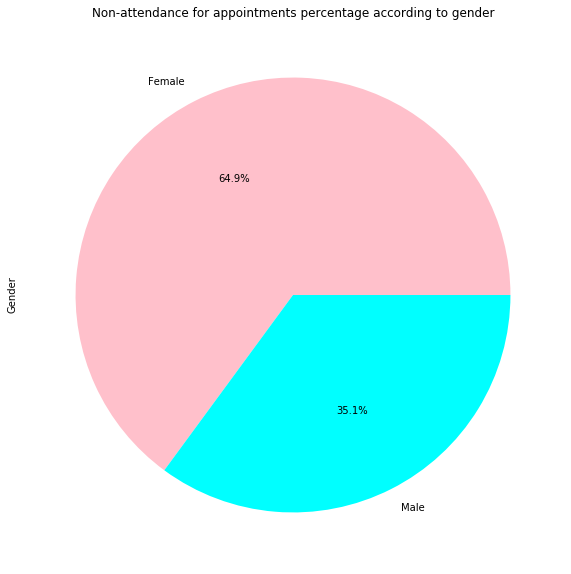

In [11]:
df_noshow['Gender'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',labels=['Female','Male'], colors=['pink','cyan'])
plt.title('Non-attendance for appointments percentage according to gender')

The answer is 64.9% females and 35.1% males.

### What is the period when most patients do not attend morning or afternoon?

Text(0.5, 1.0, 'Non-attendance for appointments percentage according to appointment time period')

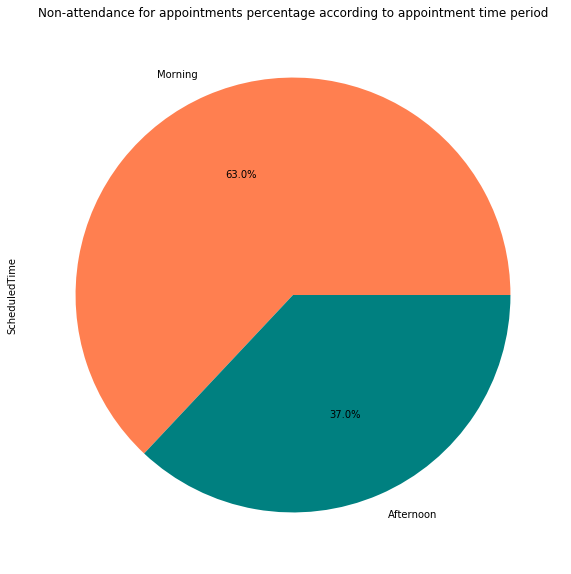

In [12]:
df_noshow['ScheduledTime'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',labels=['Morning','Afternoon'],colors=['coral','teal'])
plt.title('Non-attendance for appointments percentage according to appointment time period')

The answer is 63% of morning appointments and 37% of afternoon appointments.

### Does the non-presence of scholarship have relationship with not attending appointments?

Text(0.5, 1.0, 'Non-attendance for appointments percentage according to Scholarship')

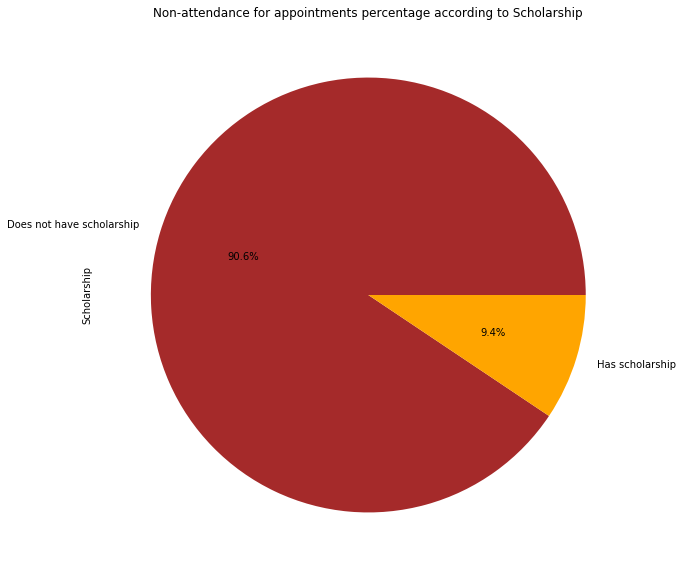

In [14]:
df_noshow['Scholarship'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', labels=['Does not have scholarship','Has scholarship'],colors=['brown','orange'])
plt.title('Non-attendance for appointments percentage according to Scholarship')

The answer is 90.6% does not have scholarship and 9.4% has sholarship.

### Did the patient who did not attend the appointment receive the reminder or not?

Text(0.5, 1.0, 'Non-attendance for appointments percentage according to receive SMS')

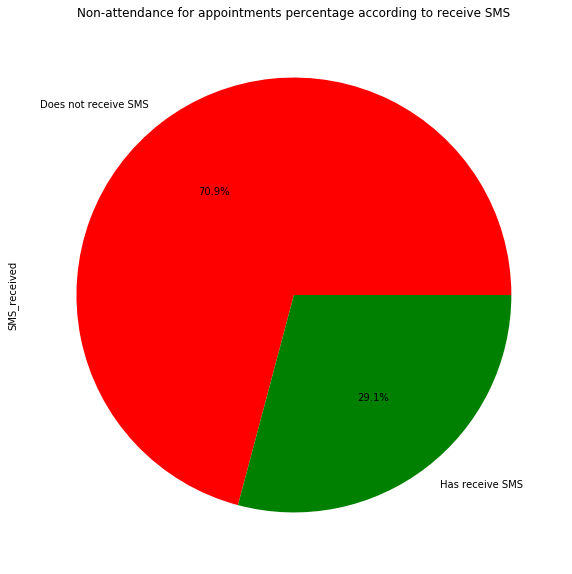

In [15]:
df_noshow['SMS_received'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', labels=['Does not receive SMS','Has receive SMS'],colors=['red','green'])
plt.title('Non-attendance for appointments percentage according to receive SMS')

The answer is 70.9% does not receive SMS and 29.1% has receive SMS.

### What are the neighborhoods where most patients do not attend appointments?

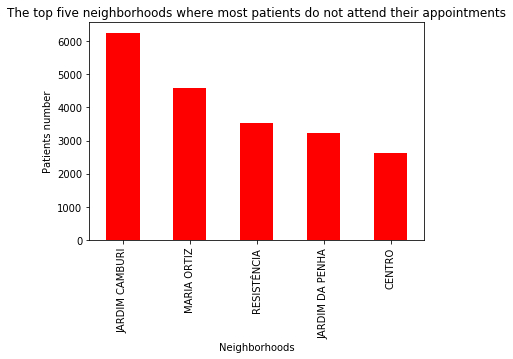

In [16]:
df_noshow['Neighbourhood'].value_counts().head(5).plot(kind='bar', color='red')
plt.title('The top five neighborhoods where most patients do not attend their appointments')
plt.xlabel('Neighborhoods')
plt.ylabel('Patients number');

The answers are Jardim camburi, maria ortiz, resistencia, jardim da penha and centro.

### What are the neighborhoods where most patients attend appointments? 

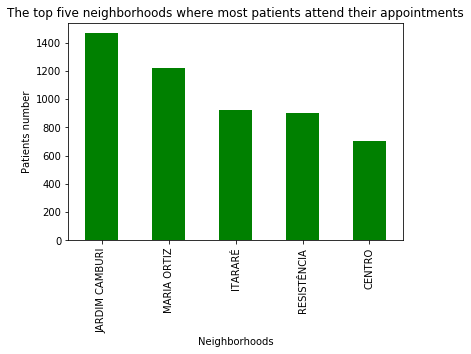

In [17]:
df_show['Neighbourhood'].value_counts().head(5).plot(kind='bar', color='green')
plt.title('The top five neighborhoods where most patients attend their appointments')
plt.xlabel('Neighborhoods')
plt.ylabel('Patients number');

The answers are Jardim camburi, maria ortiz, itarare, resistencia and centro.

### What is the average age of those who attend their appointments and those who do not attend?

In [18]:
noshow_mean=df_noshow.Age.mean()
show_mean=df_show.Age.mean()
print('Average age of patients attending their appointments is', int(show_mean))
print('Average age of patients not attending their appointments is', int(noshow_mean))

Average age of patients attending their appointments is 34
Average age of patients not attending their appointments is 37


### What are the most health conditions that attend for appointments?

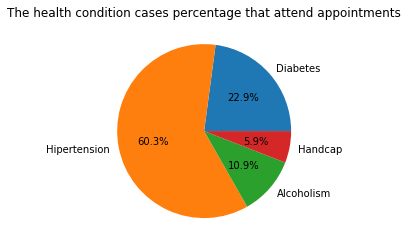

In [19]:
Diabetes=df_show.Diabetes[df_show.Diabetes == 1].sum()
Hipertension=df_show.Hipertension[df_show.Hipertension == 1].sum()
Alcoholism=df_show.Alcoholism[df_show.Alcoholism == 1].sum()
Handcap=df_show.Handcap[df_show.Handcap == 1].sum()


plt.pie([Diabetes,Hipertension,Alcoholism,Handcap],labels=['Diabetes','Hipertension','Alcoholism','Handcap'],autopct='%1.1f%%')
plt.title('The health condition cases percentage that attend appointments')
plt.show()

The answers are 60.3% of Hipertension patients, 22.9% of Diabetes patients, 10.9% of Alcoholism patients and 5.9% of Handcap patients.

### What are the most health conditions that do not attend for appointments?

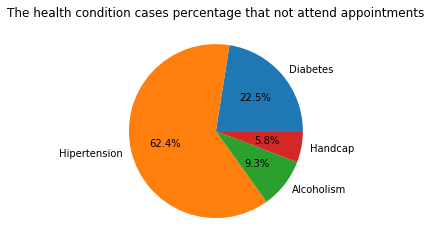

In [20]:
Diabetes=df_noshow.Diabetes[df_noshow.Diabetes == 1].sum()
Hipertension=df_noshow.Hipertension[df_noshow.Hipertension == 1].sum()
Alcoholism=df_noshow.Alcoholism[df_noshow.Alcoholism == 1].sum()
Handcap=df_noshow.Handcap[df_noshow.Handcap == 1].sum()


plt.pie([Diabetes,Hipertension,Alcoholism,Handcap],labels=['Diabetes','Hipertension','Alcoholism','Handcap'],autopct='%1.1f%%')
plt.title('The health condition cases percentage that not attend appointments')
plt.show()

The answers are 62.4% of Hipertension patients, 22.5% of Diabetes patients, 9.3% of Alcoholism patients and 5.8% of Handcap patients.

<a id='conclusions'></a>
## Conclusions

From the data analysis process, the results showed that the factors affecting the patient's attendance or not are gender, the time period of the appointment, the presence of scholarship and the receive of the SMS. And that the rest of the factors such as age, neighborhood and health conditions are not influential.

In my opnion, The results seem logical because the possibility of females not attending is higher due to the lack of transportation or the absence of those who look after their children, and because in the morning period patients are often associated with work times. Lack of scholarship is a convincing reason due to the high costs of treatment in most hospitals, and of course the most important factor is not receiving a reminder message because patients simply forgot the appointment.